# New Section

In [ ]:
!pip install numpy pandas matplotlib scikit-learn tensorflow keras openpyxl


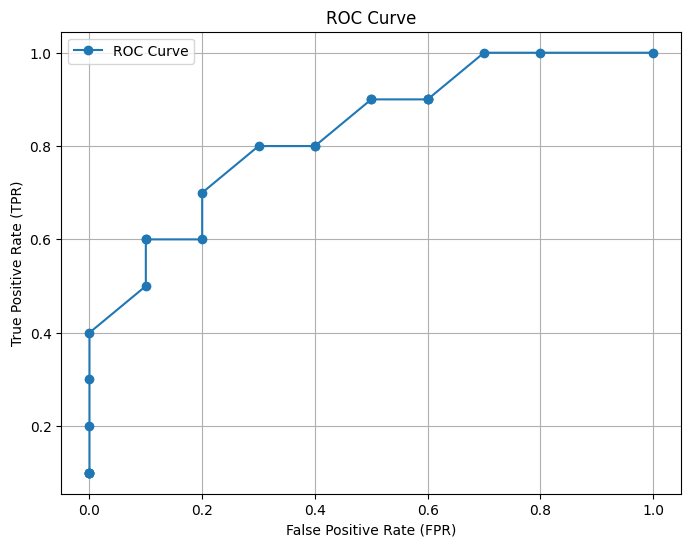

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Given data
data = [
    ('Positive', 25), ('Positive', 21), ('Positive', 20), ('Positive', 19), ('Positive', 18),
    ('Positive', 17), ('Positive', 14), ('Positive', 13), ('Positive', 10), ('Positive', 5),
    ('Negative', 18), ('Negative', 15), ('Negative', 13), ('Negative', 12), ('Negative', 10),
    ('Negative', 8), ('Negative', 5), ('Negative', 4), ('Negative', 3), ('Negative', 3)
]

# Convert to DataFrame
df = pd.DataFrame(data, columns=['Label', 'Score'])

# Convert labels to binary (Positive = 1, Negative = 0)
df['Label'] = df['Label'].apply(lambda x: 1 if x == 'Positive' else 0)

# Sort data by score (descending)
df = df.sort_values(by='Score', ascending=False)

# Compute TPR & FPR at different thresholds
thresholds = np.arange(3, 26)
tpr_list, fpr_list = [], []

for threshold in thresholds:
    df['Predicted'] = df['Score'].apply(lambda x: 1 if x >= threshold else 0)
    tp = sum((df['Predicted'] == 1) & (df['Label'] == 1))
    fp = sum((df['Predicted'] == 1) & (df['Label'] == 0))
    fn = sum((df['Predicted'] == 0) & (df['Label'] == 1))
    tn = sum((df['Predicted'] == 0) & (df['Label'] == 0))

    tpr = tp / (tp + fn)  # True Positive Rate
    fpr = fp / (fp + tn)  # False Positive Rate

    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_list, tpr_list, marker='o', linestyle='-', label="ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Given expression values
values = np.array([10, 13, 15, 20])

# MLE estimation (Manual Calculation)
theta_mle_manual = np.mean(values)
print("Manually Computed θ (MLE):", theta_mle_manual)

# Using Python
from scipy.stats import norm

theta_mle_python = norm.fit(values)[0]
print("Python Computed θ (MLE):", theta_mle_python)

Manually Computed θ (MLE): 14.5
Python Computed θ (MLE): 14.5


File 'patient1.csv' not found. Please make sure it's in the correct directory or provide the full path.
Using a sample DataFrame for demonstration.
Intercept: -25.437726630058485
Weight for age: 0.5652832938983132


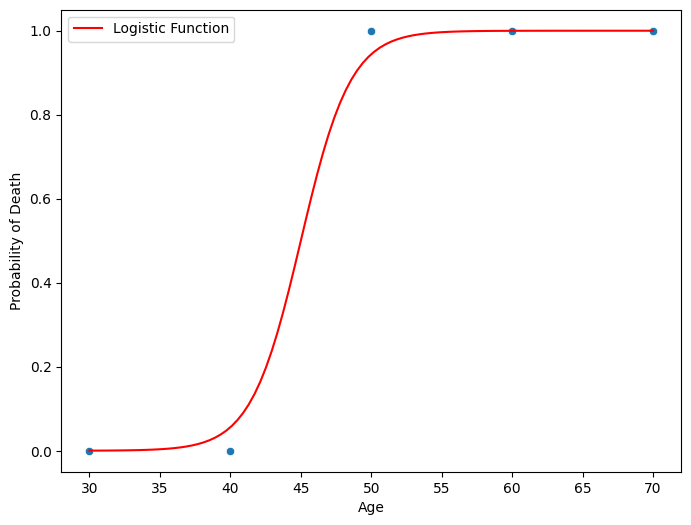

In [ ]:
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
# Assuming 'patient1.csv' is in the same directory as the notebook
# If not, replace with the correct path
try:
    df_patient = pd.read_csv("patient1.csv")
except FileNotFoundError:
    print("File 'patient1.csv' not found. Please make sure it's in the correct directory or provide the full path.")
    # If the file is essential and not found, create a sample DataFrame for demonstration purposes
    df_patient = pd.DataFrame({'age': [30, 40, 50, 60, 70], 'status': [0, 0, 1, 1, 1]})
    print("Using a sample DataFrame for demonstration.")

# ... rest of your code remains the same ...


# Extract features and labels
X = df_patient[['age']]
y = df_patient['status']

# Fit Logistic Regression model
model = LogisticRegression()
model.fit(X, y)

# Get model coefficients
w0 = model.intercept_[0]
w1 = model.coef_[0][0]

print(f"Intercept: {w0}")
print(f"Weight for age: {w1}")

# Plot logistic function
ages = np.linspace(df_patient['age'].min(), df_patient['age'].max(), 100)
logistic_curve = 1 / (1 + np.exp(-(w0 + w1 * ages)))

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_patient['age'], y=df_patient['status'])
plt.plot(ages, logistic_curve, color='red', label="Logistic Function")
plt.xlabel("Age")
plt.ylabel("Probability of Death")
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

# Load dataset
df_train = pd.read_excel("content/Immunotherapy(3).xlsx", sheet_name="training data set")
df_test = pd.read_excel("content/Immunotherapy(3).xlsx", sheet_name="test data set")

# Split into input and output
X_train = df_train.iloc[:, :-1]  # All columns except last
y_train = df_train.iloc[:, -1]   # Last column (treatment result)

X_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:, -1]

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build Neural Network
model = Sequential([
    Dense(16, activation='tanh', input_shape=(X_train.shape[1],)),
    Dense(8, activation='tanh'),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=8, verbose=1)

# Test model
predictions = model.predict(X_test_scaled)
predictions = (predictions > 0.5).astype(int)

print("Predictions on Test Set:", predictions.flatten())


FileNotFoundError: [Errno 2] No such file or directory: 'content/Immunotherapy(3).xlsx'

Error: 'Immunotherapy.xlsx' not found. Make sure the file is in the correct location or provide the full path.


FileNotFoundError: [Errno 2] No such file or directory: 'content/Immunotherapy(3).xlsx'

In [ ]:
# Install required libraries (Run this first in Google Colab)
!pip install tensorflow pandas numpy scikit-learn openpyxl

# Import required libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = "/mnt/data/Immunotherapy (3).xlsx"

# Read the training and test data from the Excel file
df_train = pd.read_excel(file_path, sheet_name="Training data set")
df_test = pd.read_excel(file_path, sheet_name="Test data set")

# Convert target variable (-1 -> 0 for binary classification)
df_train["Result_of_Treatment"] = df_train["Result_of_Treatment"].replace(-1, 0)
df_test["Result_of_Treatment"] = df_test["Result_of_Treatment"].replace(-1, 0)

# Separate features (X) and target variable (y)
X_train = df_train.iloc[:, :-1]  # Features (all columns except the last)
y_train = df_train.iloc[:, -1]   # Target variable (last column)

X_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:, -1]

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Neural Network Model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  # Input Layer
    BatchNormalization(),
    Dropout(0.3),

    Dense(16, activation='relu'),  # Hidden Layer 1
    BatchNormalization(),
    Dropout(0.3),

    Dense(8, activation='relu'),   # Hidden Layer 2
    Dense(1, activation='sigmoid')  # Output Layer (Binary Classification)
])

# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Implement EarlyStopping to prevent overfitting
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the Model with Validation Split
history = model.fit(X_train_scaled, y_train,
                    epochs=50, batch_size=8,
                    validation_split=0.2,
                    callbacks=[early_stopping], verbose=1)

# Evaluate on the Test Set
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {accuracy:.4f}")

# Print Predictions for Test Set
print("\nPredictions on Test Data:")
print(y_pred.flatten())

# Save the Model
model.save("/mnt/data/immunotherapy_model.h5")
print("\nModel saved successfully!")


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/Immunotherapy (3).xlsx'

In [ ]:
import os
os.listdir("/mnt/data/")


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/'

In [ ]:
import os

# List files in the current directory
print("Files in current directory:", os.listdir())

# Check inside '/content/' (Google Colab's default upload location)
print("Files in /content/:", os.listdir("/content/"))


Files in current directory: ['.config', 'patient1 (1).csv', 'Immunotherapy (3).xlsx', 'sample_data']
Files in /content/: ['.config', 'patient1 (1).csv', 'Immunotherapy (3).xlsx', 'sample_data']


In [ ]:
file_path = "/content/Immunotherapy (3).xlsx"


In [ ]:
# Install required libraries (Run this first in Google Colab)
!pip install tensorflow pandas numpy scikit-learn openpyxl

# Import required libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import os

# Update file path (Check the location using os.listdir() first)
file_path = "/content/Immunotherapy (3).xlsx"

# Verify the uploaded file exists
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}. Please upload the correct file.")

# Read the training and test data from the Excel file
df_train = pd.read_excel(file_path, sheet_name="Training data set")
df_test = pd.read_excel(file_path, sheet_name="Test data set")

# Convert target variable (-1 -> 0 for binary classification)
df_train["Result_of_Treatment"] = df_train["Result_of_Treatment"].replace(-1, 0)
df_test["Result_of_Treatment"] = df_test["Result_of_Treatment"].replace(-1, 0)

# Separate features (X) and target variable (y)
X_train = df_train.iloc[:, :-1]  # Features (all columns except the last)
y_train = df_train.iloc[:, -1]   # Target variable (last column)

X_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:, -1]

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Neural Network Model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  # Input Layer
    BatchNormalization(),
    Dropout(0.3),

    Dense(16, activation='relu'),  # Hidden Layer 1
    BatchNormalization(),
    Dropout(0.3),

    Dense(8, activation='relu'),   # Hidden Layer 2
    Dense(1, activation='sigmoid')  # Output Layer (Binary Classification)
])

# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Implement EarlyStopping to prevent overfitting
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the Model with Validation Split
history = model.fit(X_train_scaled, y_train,
                    epochs=50, batch_size=8,
                    validation_split=0.2,
                    callbacks=[early_stopping], verbose=1)

# Evaluate on the Test Set
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {accuracy:.4f}")

# Print Predictions for Test Set
print("\nPredictions on Test Data:")
print(y_pred.flatten())

# Save the Model
model.save("/content/immunotherapy_model.h5")
print("\nModel saved successfully!")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.4388 - loss: 0.9243 - val_accuracy: 0.5625 - val_loss: 0.6572
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4715 - loss: 0.8192 - val_accuracy: 0.5000 - val_loss: 0.6650
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5390 - loss: 0.7527 - val_accuracy: 0.5000 - val_loss: 0.6677
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4421 - loss: 0.7422 - val_accuracy: 0.5000 - val_loss: 0.6692
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6032 - loss: 0.7268 - val_accuracy: 0.5625 - val_loss: 0.6652
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5284 - loss: 0.6931 - val_accuracy: 0.6250 - val_loss: 0.6622
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step



Test Accuracy: 0.7000

Predictions on Test Data:
[1 1 1 1 0 1 1 0 1 1]

Model saved successfully!
